In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
import csv
import seaborn as sns
import IPython.core.display as di

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">toggle code visibility</button>''', raw=True)

toggle code visibility

**One-sentence takeaway: Kids who are heldover show a brief improvement in test scores, but this improvement usually only lasts about two years.**

**In other words:** A struggling kid who is held over is likely be to a struggling kid next year as well, and will certainly be a struggling kid in three years. 

---

In [5]:
df_5 = pd.read_csv("sns_g5_2014.csv")
df_6 = pd.read_csv("sns_g6_2014.csv")
df_6_2 = df_6[
    (df_6['Year'].isin(['2015','2016','2017']))]
df_5_2 = df_5[
    (df_5['Group'].isin(['Holdover','All Students']))]

**Student who repeated the 5th grade, compared to those who were promoted**
---

The graph below shows the NYS test scores of students who were held over in 5th grade in 2015 (red), compared with those who were logged as potential HOs but still promoted (blue). A third group shows the test scores for all other students in the grade (green).

*The scores of the holdover cohort have been omitted for the second year they took 5th grade -- we know they will do well on that test, the real question is if their improvements are sustained in 6th and 7th grade.*

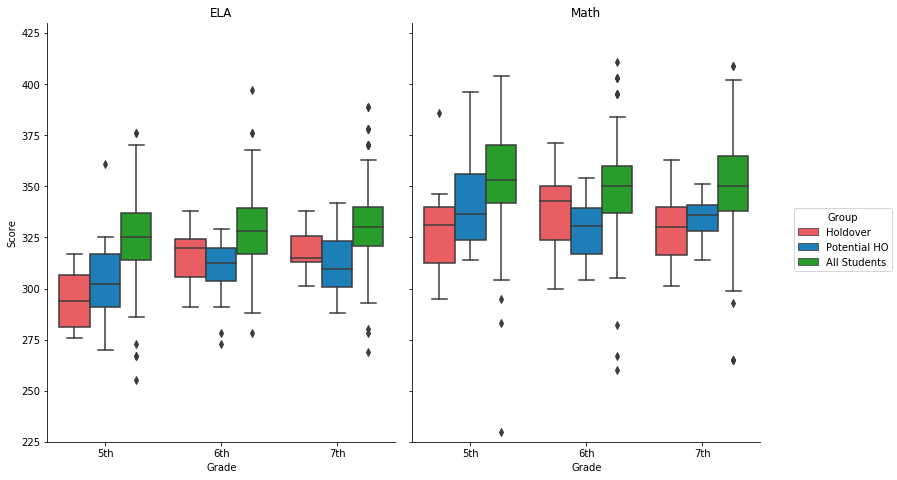

In [6]:
colors_potential = sns.xkcd_palette(['light red','cerulean','green'])
df = pd.read_csv("sns_g5_2014.csv")
g = sns.factorplot(x='Grade', y='Score', 
               hue='Group', col='Subject', hue_order=['Holdover','Potential HO','All Students'],
               kind = 'box', size=8, margin_titles=True, palette = colors_potential,
               aspect=.7, data = df)

axes = g.axes.flatten()
axes[0].set_title("ELA")
axes[1].set_title("Math")
plt.subplots_adjust(top=.8)
plt.ylim(225,430)
sns.set_context("talk")

The graph above summarizes all of the HO data I looked at fairly well: One or two years after a holdover, holdover students seem to have measurably improved; three years after the repeated grade, it's hard to tell if HO kids have benefited from repeating the grade and whether or not their trend is positive. 

When the HO kids (red) move onto sixth grade, having repeated 5th, they outperform the potential HO kids (blue) who did not repeat the grade. By 7th grade the HO kids are doing only slightly better in Math, and slightly worse in ELA than the potentail HO kids. Unfortunately, we don't have data for 8th grade, but at best we would expect HO kids to be doing about as well as the potential HOs who were promoted, and at worse we would expect them to have fallen further behind.
Since the HO students did worse on the fifth grade state test than the potential HO students, the fact that they are performing about equally by seventh grade could be considered progress. At the same time, it's a pretty meager improvement for having repeated an entire year. 

**Student who repeated the 5th grade, compared to those who were promoted**
---
The graph below shows the same data, with one dot representing the score of each student. There are 15 students in HO dataset, and 14 students in the potential HO dataset. This shows a major caveat with trying to analyze HOs at Success: there's not a lot of long-term data on HO students. We should take these charts seriously, but at the same time, we should be wary of drawing too firm of a conclusion from so few students.

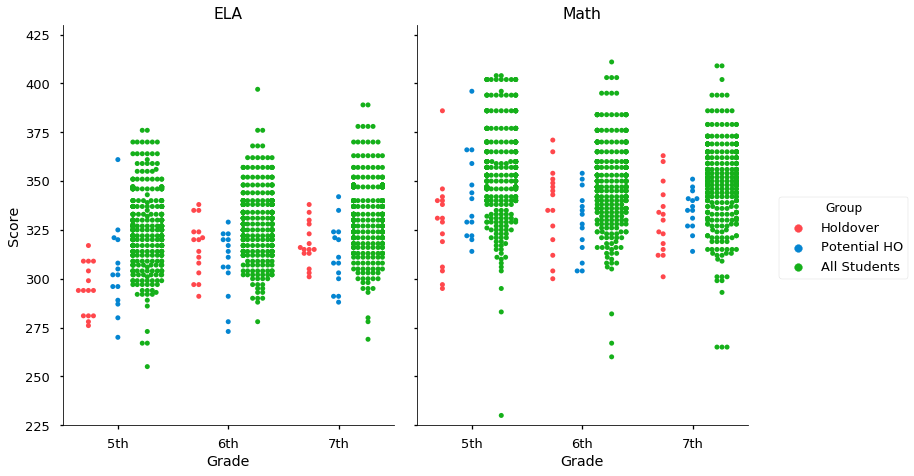

In [7]:
g = sns.factorplot(x='Grade', y='Score', 
               hue='Group', dodge=True, 
               col='Subject', hue_order=['Holdover','Potential HO','All Students'],
               kind = 'swarm', size=8, margin_titles=True, palette = colors_potential,
               aspect=.7, data = df)
axes = g.axes.flatten()
axes[0].set_title("ELA")
axes[1].set_title("Math")
plt.subplots_adjust(top=.8)
plt.ylim(225,430)
plt.show()

**Students who repeated 6th grade, compared to the rest of their class**
---
The graph below shows a cohort of students who were held over in 6th grade, and the trend is largely the same as the 5th grade HOs. As expected, their test scores improve significantly in 2015, when they are taking 6th grade for a second time, (though they are still below the grade level median). When these students advance to 7th grade, their scores improve slightly in ELA, and decline slightly in math. By 8th grade, 3 years after their holdover, their scores decline in both subjects, and most kids are below the 25th percentile of their grade. 

Unfortunately, there wasn't a large enough group of potential HOs to measurably compare with this cohort.

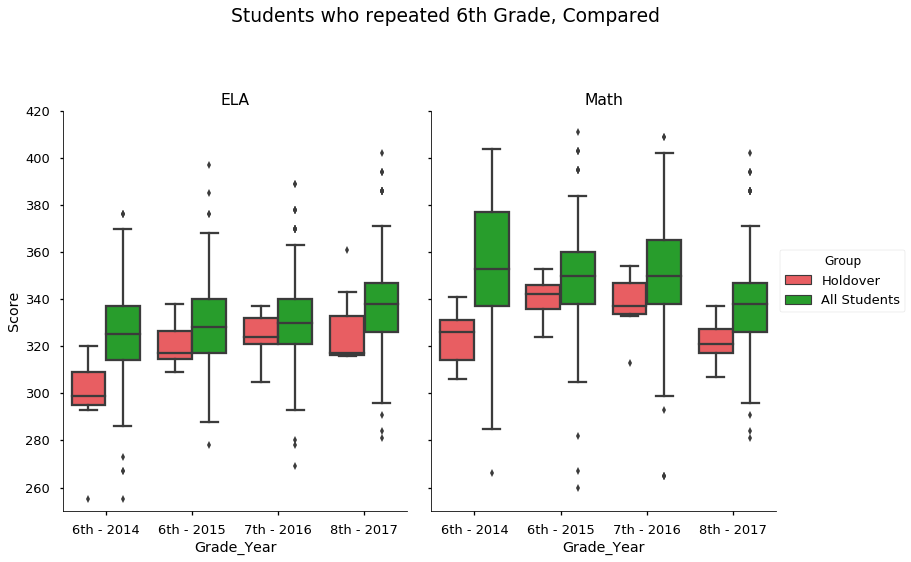

In [8]:
colors = sns.xkcd_palette(['light red','green'])
df_6 = pd.read_csv("sns_g6_2014.csv")
g = sns.factorplot(x='Grade_Year', y='Score', 
               hue='Group', col='Subject', 
               kind = 'box', size=8,
                palette = colors,
               aspect=.7, data = df_6)
axes = g.axes.flatten()
axes[0].set_title("ELA")
axes[1].set_title("Math")
plt.subplots_adjust(top=.8)
plt.ylim(250,420)
g.fig.suptitle("Students who repeated 6th Grade, Compared")
sns.set_context("talk")
plt.show()

Below is that exact same data, with one dot representing one student. 

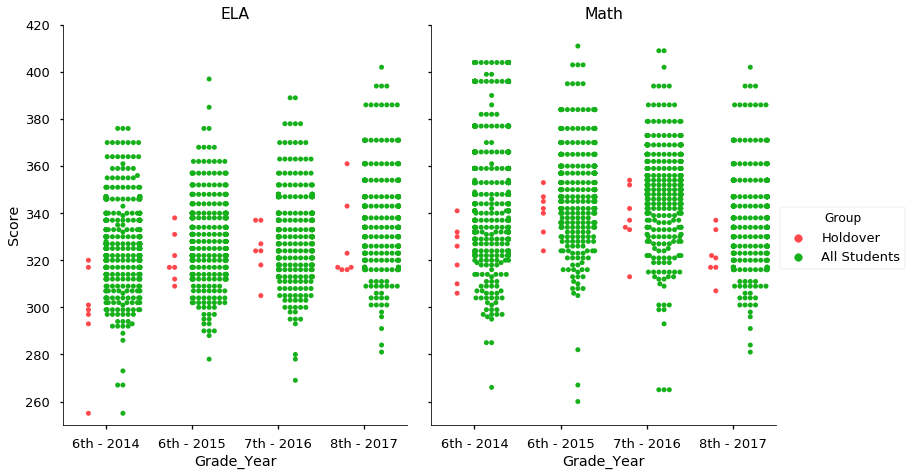

In [9]:
g = sns.factorplot(x='Grade_Year', y='Score', 
               hue='Group', col='Subject', 
               kind = 'swarm', size=8,
               aspect=.7, dodge = True,
               palette = colors, data = df_6)
axes = g.axes.flatten()
axes[0].set_title("ELA")
axes[1].set_title("Math")
plt.subplots_adjust(top=.8)
plt.ylim(250,420)
sns.set_context("talk")
plt.show()